In [1]:
from datetime import datetime, timedelta,date
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
Df=pd.read_csv("Retail.csv", encoding= 'unicode_escape')

In [3]:
Df.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,01-12-2010 09:37,2.55,14688.0,United Kingdom
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,01-12-2010 09:37,0.42,14688.0,United Kingdom
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,01-12-2010 09:37,0.55,14688.0,United Kingdom
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,01-12-2010 09:37,0.55,14688.0,United Kingdom


In [4]:
Df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


In [5]:
Df.shape

(541909, 8)

In [6]:
Df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [7]:
Df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [8]:
Df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Description Has 1454 And CustomerId Has 135080 Null Values

In [9]:
#Droping Rows Where Description Is Null
Df.dropna(axis=0,subset=['Description'],inplace=True)
Df.dropna(axis=0,subset=['CustomerID'],inplace=True)

In [10]:
#Now There Is No Null Value In Data
Df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
#Converting Argument Into Date And Time Format
Df['InvoiceDate']=pd.to_datetime(Df['InvoiceDate']).dt.date

In [12]:
Df=Df[pd.notnull(Df['CustomerID'])]
Df=Df[(Df['Quantity']>0)]

In [13]:
#Calculating Sales
Df['Sales'] = Df['Quantity'] * Df['UnitPrice']
cols_of_interest = ['CustomerID', 'InvoiceDate', 'Sales']
Df = Df[cols_of_interest]

In [14]:
print(Df['InvoiceDate'].min())

2010-01-12


In [15]:
print(Df['InvoiceDate'].max())

2011-12-10


In [16]:
Df.head()

,CustomerID,InvoiceDate,Sales
0,17850.0,2010-01-12,15.30
1,17850.0,2010-01-12,20.34
2,17850.0,2010-01-12,22.00
3,17850.0,2010-01-12,20.34
4,17850.0,2010-01-12,20.34


In [17]:
#No. Of Customers
Df['CustomerID'].nunique()

4339

In [18]:
Df.shape

(397924, 3)

In [19]:
Df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.0,16795.0,18287.0
Sales,397924.0,22.394749,309.055588,0.0,4.68,11.8,19.8,168469.6


Frequency- Number Of Repeat Purchases The Customer Has Made.

Recency-Represents The Age Of The Customer When They Made Their Most Recent Purchases. This Is Equal To The Duration Between A Customer’s First Purchase And Their Latest Purchase. (Thus if they have made only 1 purchase, the recency is 0.)


T-Customer's Age, Days Since Last Purchase.

Monetary_Value-Transaction Value In The Given Period

In [20]:
from lifetimes.plotting import *
from lifetimes.utils import *

In [21]:
M =summary_data_from_transaction_data(Df, 'CustomerID', 'InvoiceDate', 
                                               monetary_value_col='Sales', 
                                               observation_period_end='2011-12-9')

In [22]:
M.head(10)

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,476.0,515.0,599.701667
12348.0,3.0,283.0,358.0,301.480000
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000
12352.0,6.0,268.0,340.0,253.565000
12353.0,0.0,0.0,204.0,0.000000
12354.0,0.0,0.0,232.0,0.000000
12355.0,0.0,0.0,95.0,0.000000


count    4333.000000
mean        2.852527
std         5.933511
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       130.000000
Name: frequency, dtype: float64
0.35771982460189244


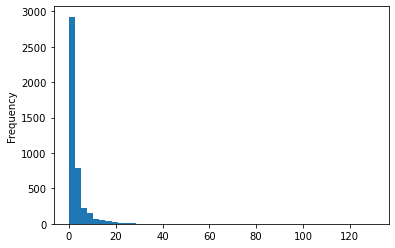

In [44]:
M['frequency'].plot(kind='hist',bins=50)
print(M['frequency'].describe())
print(sum(M['frequency'] == 0)/float(len(M)))

BG/NBD Model

In [24]:
from lifetimes import BetaGeoFitter

BGF=BetaGeoFitter(penalizer_coef=0.1)
BGF.fit(M['frequency'],M['recency'],M['T'])
print(BGF)

<lifetimes.BetaGeoFitter: fitted with 4333 subjects, a: 0.00, alpha: 65.53, b: 0.00, r: 0.64>


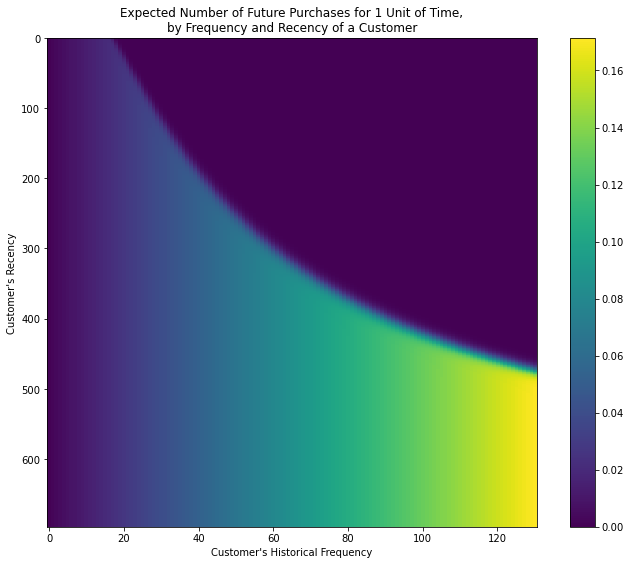

In [26]:
from lifetimes.plotting import plot_frequency_recency_matrix
fig=plt.figure(figsize=(12,9))
plot_frequency_recency_matrix(BGF)

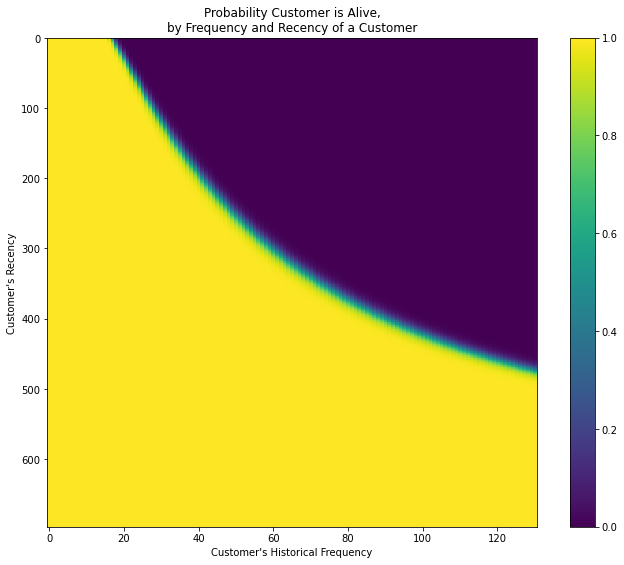

In [27]:
from lifetimes.plotting import plot_probability_alive_matrix
fig=plt.figure(figsize=(12,9))
plot_probability_alive_matrix(BGF)

# Top 5 Customers Who Will That Model Expects To Make Purchase In Next 5 Days

In [28]:
t=5 #Prediction Purchase In 5 Periods
M['predicted_purchases'] = BGF.conditional_expected_number_of_purchases_up_to_time(t, M['frequency'], M['recency'], M['T'])
M.sort_values(by='predicted_purchases').tail()

,frequency,recency,T,monetary_value,predicted_purchases
CustomerID,,,,,
14606.0,88.0,692.0,696.0,135.890114,0.581961
15311.0,88.0,688.0,696.0,671.460227,0.581961
17841.0,110.0,694.0,696.0,362.595727,0.726407
12748.0,113.0,692.0,696.0,298.360885,0.746104
14911.0,130.0,695.0,696.0,1088.284385,0.857721


In [30]:
Summary = calibration_and_holdout_data(Df, 'CustomerID', 'InvoiceDate',
                                        calibration_period_end='2011-08-31',
                                        observation_period_end='2011-12-09' )

In [31]:
pd.DataFrame(Summary.head())

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
CustomerID,,,,,
12346.0,0.0,0.0,225.0,0.0,100.0
12347.0,4.0,365.0,415.0,2.0,100.0
12348.0,2.0,139.0,258.0,1.0,100.0
12350.0,0.0,0.0,210.0,0.0,100.0
12352.0,4.0,78.0,240.0,2.0,100.0


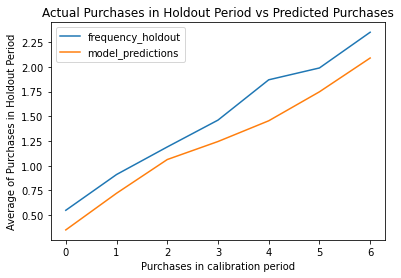

In [32]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

BGF2 = BetaGeoFitter(penalizer_coef=0.1)
BGF2.fit(Summary['frequency_cal'], Summary['recency_cal'], Summary['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(BGF2, Summary)

In [33]:
t = 8
individual = M.loc[12347]
BGF.predict(t, individual['frequency'], individual['recency'], individual['T'])

0.09144878233252689

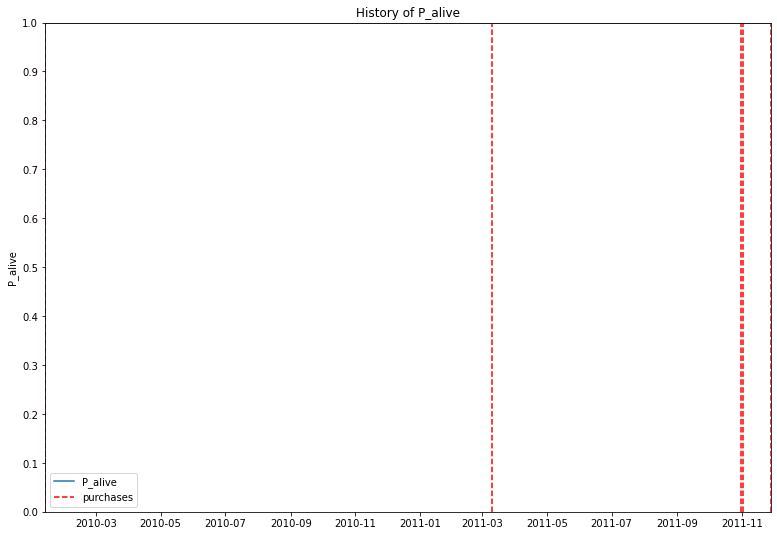

In [34]:
from lifetimes.plotting import plot_history_alive
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,9))
Id = 17924
days_since_birth = 365
sp_trans = Df.loc[Df['CustomerID'] == Id]
plot_history_alive(BGF, days_since_birth, sp_trans, 'InvoiceDate')

Gamma Gamma Model

In [35]:
from lifetimes.datasets import load_cdnow_summary_data_with_monetary_value

Summary_MoneyValue = load_cdnow_summary_data_with_monetary_value()
Summary_MoneyValue.head()
CustSummary = Summary_MoneyValue[Summary_MoneyValue['frequency']>0]


In [36]:
CustSummary.head()

,frequency,recency,T,monetary_value
customer_id,,,,
1,2,30.43,38.86,22.35
2,1,1.71,38.86,11.77
6,7,29.43,38.86,73.74
7,1,5.00,38.86,11.77
9,2,35.71,38.86,25.55


In [37]:
CustSummary[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.113884
frequency,0.113884,1.000000


In [38]:
from lifetimes import GammaGammaFitter

GGF = GammaGammaFitter(penalizer_coef = 0)
GGF.fit(CustSummary['frequency'],CustSummary['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 946 subjects, p: 6.25, q: 3.74, v: 15.45>

In [39]:
AvgP=GGF.conditional_expected_average_profit(Summary_MoneyValue['frequency'],Summary_MoneyValue['monetary_value'])    

In [40]:
AvgP.head()

customer_id
1    24.658616
2    18.911480
3    35.171002
4    35.171002
5    35.171002
dtype: float64

In [41]:
print("Conditional Average Profit: %s, Average profit: %s" % (GGF.conditional_expected_average_profit(Summary_MoneyValue['frequency'],Summary_MoneyValue['monetary_value']).mean(),Summary_MoneyValue[Summary_MoneyValue['frequency']>0]['monetary_value'].mean()))

Conditional Average Profit: 35.25295817605012, Average profit: 35.07855179704017


In [42]:
BGF.fit(M['frequency'], M['recency'], M['T'])

print(GGF.customer_lifetime_value(
    BGF, #the model to use to predict the number of future transactions
    M['frequency'],
    M['recency'],
    M['T'],
    M['monetary_value'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
).head(10))

c:\users\kiit\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


CustomerID
12346.0      19.342896
12347.0    2166.065336
12348.0     775.346561
12349.0            NaN
12350.0      20.115520
12352.0    1318.725086
12353.0      28.026498
12354.0      25.388975
12355.0            NaN
12356.0     518.824298
Name: clv, dtype: float64
